## Lab: Exploring Time Series

#### Scenario

You are a junior data scientist at AirGo Analytics, an airline consulting firm. Your task is to analyze airline passenger traffic trends to help the company optimize its scheduling and pricing strategies. The company wants insights into passenger growth trends, seasonality, and stationarity of the data.

### Step 0: Load the Dataset
* Import the AirPassengers.csv dataset.
* Display the first 5 rows to examine the structure.

In [40]:
# CodeGrade step0

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Load dataset
data = pd.read_csv('AirPassengers.csv')

# Look at the data
data.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


### Step 1: Convert the Data to a Time Series Format
* Convert the time column to datetime format.
* Set the Month column as the index.
* Rename value to `Passengers`.
* Verify by checking a specific value, viz. the last value using '.iloc'.



In [ ]:
# CodeGrade step1

def fractional_year_to_datetime(fraction):
    year = int(fraction)
    month = int(round((fraction - year) * 12)) + 1
    return pd.Timestamp(year=year, month=month, day=1)

data['time'] = data['time'].apply(fractional_year_to_datetime)
print("\nCreate")
print(data['time'].dtype)

# Convert to DataFrame and set index
data['Month'] = data['time']
# data['Month'] = pd.to_datetime(data['Month']).dt.month
# print("\nCreate Month column from time column\n")
# print(data.head())

data.set_index('Month', inplace=True)
print("\nSet month to index\n")
print(data.head())

# Change the format to '%Y' to match the year-only format in the 'time' column
data['time'] = pd.to_datetime(data['time']).dt.strftime('%Y')
print("\nChange time column format to %Y\n")
print(data.head())

data.rename(columns={'value': 'Passengers'}, inplace=True)
data[-1:]



Create
datetime64[ns]

Change time column format to %Y

            time  value
Month                  
1949-01-01  1949    112
1949-02-01  1949    118
1949-03-01  1949    132
1949-04-01  1949    129
1949-05-01  1949    121


,time,Passengers
Month,,
1960-12-01,1960,432


Plot the time series data to visually inspect trends.

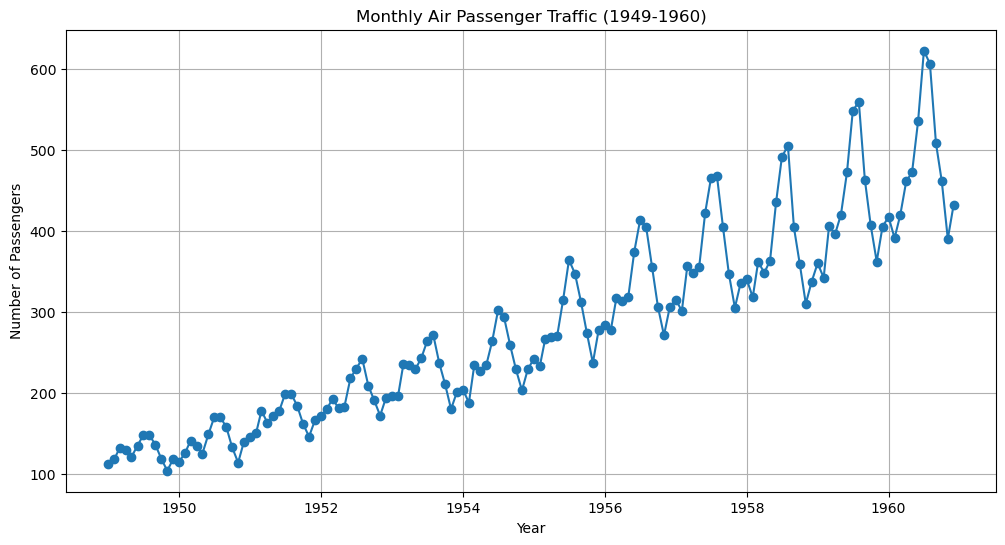

In [42]:
# Plot Time Series
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], marker='o', linestyle='-')
plt.title("Monthly Air Passenger Traffic (1949-1960)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid()
plt.show()

### Step 2: Compute Rolling Statistics
* Compute the rolling mean and rolling standard deviation over 12 months.
* Display rounded values for the first non-NA value, rounding to 1 decimal plave for the rolling mean and the rolling standard deviation
 *  Output: rounded rolling mean value, roundied rolling standard deviation value

In [45]:
# CodeGrade step2

# Rolling mean and standard deviation
rolling_mean = data['Passengers'].rolling(window=12).mean()
rolling_std = data['Passengers'].rolling(window=12).std()

# find the first non-NA value, round to 1 decimal place
first_mean = rolling_mean.dropna().iloc[0]
first_std = rolling_std.dropna().iloc[0]

# Round to 1 decimal place
first_mean_rounded = round(first_mean, 1)
first_std_rounded = round(first_std, 1)

print("First 12-month Rolling Mean (rounded):", first_mean_rounded)
print("First 12-month Rolling Std Dev (rounded):", first_std_rounded)


First 12-month Rolling Mean (rounded): 126.7
First 12-month Rolling Std Dev (rounded): 13.7


Plot the rolling statistics to analyze trends.

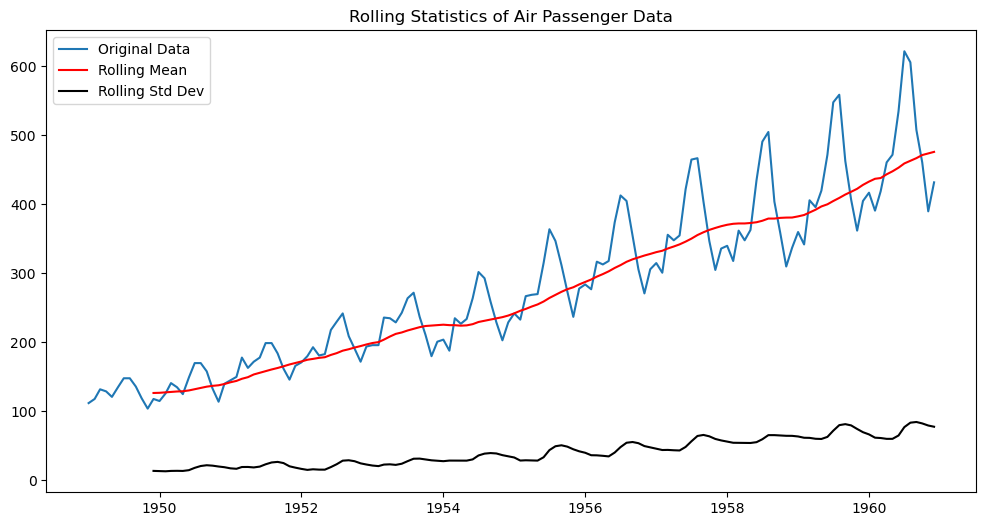

In [ ]:
# Plot the Rolling Statistics

plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='black')
plt.legend()
plt.title("Rolling Statistics of Air Passenger Data")
plt.show()

### Step 3: Perform the Dickey-Fuller Test
* Compute the ADF statistic.
 * Return rounded to four decimal places.

In [51]:
# CodeGrade step3

# Dickey-Fuller Test
result = adfuller(data['Passengers'])

# ADF
print(round(result[0], 4))

0.8154


the ADF statistic is positive, meaning the series is not stationary

### Step 4: Compute the p-value
* Check the p-value to determine stationarity.
  * Return rounded to four decimal places.

In [52]:
# CodeGrade step4

# Dickey-Fuller Test
result = adfuller(data['Passengers'])

# p-value
print(round(result[1], 4))

0.9919


a high p-value means the data is not stationary and has the presence of a strong trend or seasonality

### Step 5: Display Critical Values
* Show the critical values for different confidence levels.
  * Return the critical values; do not round.

In [57]:
# CodeGrade step5

# Dickey-Fuller Test
result = adfuller(data['Passengers'])

#Critical Values
for k, v in result[4].items():
    print(f"At {k} confidence level, the critical value is {v}")


At 1% confidence level, the critical value is -3.4816817173418295
At 5% confidence level, the critical value is -2.8840418343195267
At 10% confidence level, the critical value is -2.578770059171598


The critical values are less than the ADF statistic, therefore the series is not stationary.

### Step 6: Apply Log Transformation & Differencing

* Apply log transformation to stabilize variance.
* Perform first-order differencing to remove trends.
* Return the dataset shape after transformation.

In [59]:
# CodeGrade step6

# Log Transformation
data['Log_Passengers'] = np.log(data['Passengers'])

# Differencing (first order)
data['Diff_Passengers'] = data['Log_Passengers'].diff()

print(data.shape)


(144, 4)


Plot the differenced data.

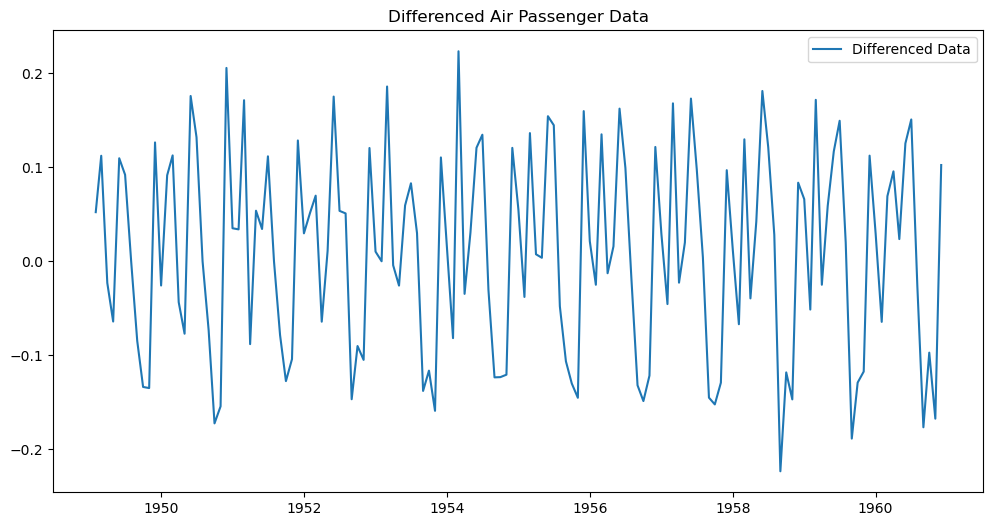

In [60]:
# Plot the differenced data

plt.figure(figsize=(12, 6))
plt.plot(data['Diff_Passengers'], label="Differenced Data")
plt.legend()
plt.title("Differenced Air Passenger Data")
plt.show()

### Step 7: Compute the ADF Statistic After Differencing
* Perform the Dickey-Fuller Test on the differenced data.
  * Return rounded to four decimal places.

In [63]:
# CodeGrade step7
data.dropna(subset=['Diff_Passengers'], inplace=True)
# Dickey-Fuller Test after Differencing
result = adfuller(data['Diff_Passengers'])

# ADF
print(round(result[0], 4))


-2.7171


### Step 8: Compute the p-value After Differencing
* Check whether the data is now stationary.
  * Return rounded to four decimal places.

In [65]:
# CodeGrade step8

# Dickey-Fuller Test after Differencing
result = adfuller(data['Diff_Passengers'])

# p-value
print(round(result[1], 4))

0.0711


p-value is > 0.05 which means its still not stationary

### Step 9: Display Critical Values After Differencing
* Check critical values for the differenced data.
  * Return the critical values; do not round.

In [66]:
# CodeGrade step9

# Dickey-Fuller Test after Differencing
result = adfuller(data['Diff_Passengers'])

# Critical values
for k, v in result[4].items():
    print(f"At {k} confidence level, the critical value is {v}")

At 1% confidence level, the critical value is -3.4825006939887997
At 5% confidence level, the critical value is -2.884397984161377
At 10% confidence level, the critical value is -2.578960197753906


ADF stat = -2.7171

the data is stationary at 10% confidence level